In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rcParams
from math import pi, ceil
from custom_func import *
from tqdm import tqdm_notebook

In [2]:
path = "./../v0.5/outputs/calculated_index"
filenames = os.listdir(path)
filenames.sort()

df_index = pd.DataFrame()
for filename in filenames:
    if df_index.empty:
        df_index = pd.read_csv(os.path.join(path,filename))
    else:
        df_index = df_index.merge(pd.read_csv(os.path.join(path,filename)),on='region',how='left')
        
print(df_index.shape)
#видалити Київ
#df_index = df_index.drop(df_index.index[df_index['region']=='м. Київ']).reset_index(drop=True)
#print(df_index.shape)
df_index.T

(24, 52)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
region,Волинська,Вінницька,Дніпропетровська,Донецька,Житомирська,Закарпатська,Запорізька,Київська,Івано-Франківська,Кіровоградська,...,Полтавська,Рівненська,Сумська,Тернопільська,Харківська,Херсонська,Хмельницька,Черкаська,Чернівецька,Чернігівська
p1_01,1,0.030567,0.250081,0.0262061,0.0488941,0.839785,0.391019,0.0528423,0.487118,0,...,0.0357884,0.0893589,0.0227038,0.0646654,0.00919234,0.642689,0,0.0206746,0.306066,0
p1_02,0,0,0,0,0,0.265229,0,0,1,0,...,0,0,0,0,0,0,0,0,0.987638,0
p1_03,0.22997,0.286085,0.187103,0.167278,0.21189,0.129672,0.124642,0.242983,0.160098,0.179614,...,0.114116,0.150454,0.0876897,0.2495,0.188228,0.182423,0.226405,0.0723241,0.240044,0.117477
p1_04,0.898782,0.465472,0.607682,0.726443,0.814445,0.856026,0.637657,0.546132,0.800366,0.880617,...,0.612972,0.812142,0.766433,0.60902,0.807846,0.761507,0.84906,0.771743,0.727647,0.758802
P1,5.32188,1.95531,2.61216,2.29982,2.68807,5.22678,2.88329,2.10489,6.11895,2.65058,...,1.90719,2.62989,2.19207,2.30796,2.51317,3.96655,2.68866,2.16185,5.65349,2.1907
p2_01,0.599943,0.874382,0.717872,0.221649,0.766951,0.347174,0.699201,0.839828,0.649869,0.475612,...,0.776309,0.482617,1,0.540219,0.570936,0.406814,0.526475,0.486857,0.190523,0.558847
p2_02,0.160247,0.465336,1,0.437363,0.294074,0.115136,0.425825,0.57529,0.285045,0.105768,...,0.3771,0.134137,0.311543,0.146196,0.670899,0.099178,0.180909,0.176269,0,0.148488
p2_03,0.637031,0.919764,0.0814206,0.204585,0.752153,0.281686,0.276226,0.274995,0.972227,0.156829,...,0.194113,0.348341,1,0.774293,0.135913,0.282551,0.252265,0.193775,0,0.295687
p2_04,0.0730658,0.267598,1,0.504806,0.0767925,0.120125,0.172996,0.726074,0.274086,0.00145432,...,0.245644,0.0569025,0.0687238,0.0372191,0.658602,0.090481,0,0.0781056,0.0101925,0.0785806


In [3]:
dict_weights = {
    'P1':2,
    'P2':2,
    'P3':0.5,
    'P4':1,
    'P5':1,
    'P6':2,
    'P7':1,
    'P8':0.5
}

#rows = df_index.loc[:,df_index.columns.str.contains('P')]
#row = rows.iloc[0]
#print(weighted_average(row, dict_weights,df_index.loc[:,df_index.columns.str.contains('P')].columns))

df_index.loc[:,df_index.columns.str.contains('P')].columns

cols = df_index.loc[:,df_index.columns.str.contains('P')].columns
df_index['I'] = df_index.loc[:,df_index.columns.str.contains('P')].apply(lambda x: weighted_average(x,dict_weights,cols),axis=1)*10

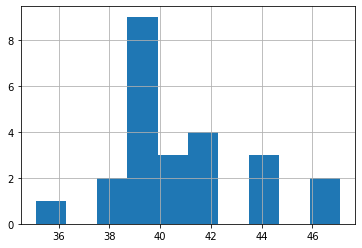

In [4]:
df_index['I'].hist()
plt.show()

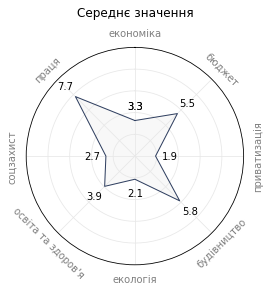

In [5]:
dict_labels = {
        'P1':'економіка',
        'P2':'бюджет',
        'P3':'приватизація',
        'P4':'будівництво',
        'P5':'екологія',
        'P6':"освіта та здоров'я",
        'P7':'соцзахист',
        'P8':'праця'
    }


def draw_spider(ax,angles,values,values_mean,cols):
    #кути, на які слід повернути підписи осі x
    rot_angles = [0,-45,90,45,0,-45,90,45,0]
    
    ax.set_rlabel_position(0)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    yticks = [i for i in range(0,12,2)]
    locs, labels = plt.xticks(angles[:-1], cols, color='grey', size=10,rotation=90)
    plt.yticks(yticks, [])
    
    plt.grid(color='#E8E8E8')
    ax.axis([0, angles[-1], 0, 10])
    ax.fill(angles, values_mean, color='gray', alpha=0.05)
    ax.plot(angles, values, linewidth=1, linestyle='solid',color='#2f3f60')
    for i,j in zip(angles,values):
        ax.annotate(str(round(j,1)),xy=(i,j+1.3), ha='center', va='center')
    
    #перемалювати підписи осі x із поворотом
    plt.gcf().canvas.draw()
    for label, angle in zip(labels, rot_angles):
        x,y = label.get_position()
        ax.text(x,y, label.get_text(), transform=label.get_transform(),
                      ha=label.get_ha(), va=label.get_va(), color='grey', rotation=angle)
    ax.set_xticklabels([])

rcParams['font.size'] = 10
    
N = len(cols)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles.append(2 * pi)

values_mean = list(df_index[cols].mean())
values_mean.append(values_mean[0])
x_labels = [dict_labels[col] for col in cols]

ax = plt.subplot(111, polar=True)
draw_spider(ax,angles,values_mean,values_mean,x_labels)
ax.set_title('Середнє значення',pad=20)

plt.show()

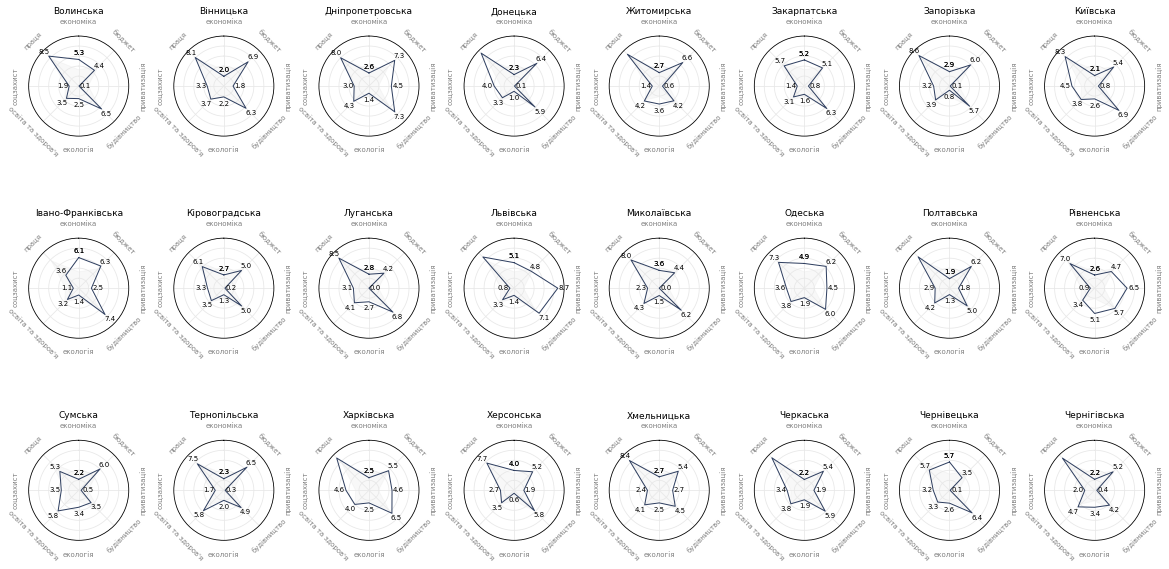

In [6]:
rcParams['font.size'] = 7

values_mean = list(df_index[cols].mean())
values_mean.append(values_mean[0])
x_labels = [dict_labels[col] for col in cols]

total = df_index.shape[0]
sub_cols = 8
sub_rows = ceil(total/sub_cols)

fig = plt.figure(figsize=(20,10))
counter = 0

for r in range(sub_rows):
    for c in range(sub_cols):
        values = list(df_index.loc[counter,cols])
        values.append(values[0])
        title = df_index.loc[counter,'region']
        counter += 1
        if counter <= total:
            ax = plt.subplot2grid((sub_rows,sub_cols), (r,c),polar=True)
            draw_spider(ax,angles,values,values_mean,x_labels)
            ax.set_title(title,pad=17,fontsize=9)

plt.subplots_adjust(wspace = 0.45, hspace = 0.45)

plt.savefig('./../00_viz/00_index_gen_v3.png', dpi = 300, bbox_inches = 'tight', pad_inches=0.3, transparent=False)
plt.show()

In [7]:
rcParams['font.size'] = 12

def delete_frame(ax):
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')

def draw_profile_gen(df,reg_index):
    fig = plt.figure(figsize=(6,4))
    values_mean = df_index[cols].mean().sort_index(ascending=False)
    values = df_index.loc[reg_index,cols].sort_index(ascending=False)
    x_labels = [dict_labels[col] for col in cols]
    x_labels.reverse()
    title = df_index.loc[reg_index,'region']

    colors = []
    for i in range(values_mean.shape[0]):
        if values[i] >= values_mean[i]:
            #colors.append('#00b874')
            colors.append('#007f86')
        elif values[i] < values_mean[i]:
            #colors.append('#ff6850')
            colors.append('#a3550f')

    ax = plt.subplot(111)
    delete_frame(ax)

    for ind in range(values_mean.shape[0]):
        ax.plot([values_mean[ind],values[ind]],[values_mean.index[ind],values_mean.index[ind]],color='black',zorder=0)
        diff = values[ind]-values_mean[ind]
        ax.annotate(str(round(diff,1)),xy=(values[ind]-diff/2,ind+0.35), ha='center', va='center',color=colors[ind],fontsize=8)
        ax.annotate(str(round(values[ind],1)),xy=(values[ind],ind-0.4), ha='center', va='center',fontsize=8)

    ax.scatter(values_mean,values_mean.index,color='gray',zorder=1,s=35)
    ax.scatter(values,values.index,color=colors,zorder=2,alpha=1,s=35)

    #ax.set_title(title+' область',pad=10)
    ax.set_yticklabels(x_labels)
    ax.set_xlim(0,10)
    ax.set_ylim(-1,8)
    ax.set_xlim(-1,11)

    plt.savefig(f'./../00_viz/00_viz_gen_noname/01_region_profile_gen_{reg_index}.png', dpi = 300, bbox_inches = 'tight', pad_inches=0.3, transparent=True)
    #plt.show()
    plt.close()
    
def draw_profile_det(df,reg_index):
    #наразі захардкодив максимальну кількість параметрів нижнього рівня
    max_params = 10

    x_labels = [dict_labels[col] for col in cols]
    total = len(x_labels)
    sub_cols = 4
    sub_rows = ceil(total/sub_cols)

    fig = plt.figure(figsize=(22,10))
    counter = 0
    for r in range(sub_rows):
        for c in range(sub_cols):
            title = x_labels[counter]
            counter += 1
            if counter <= total:
                cols_lower = df_index.loc[:,df_index.columns.str.contains('p'+str(counter))].columns
                values_mean = df_index[cols_lower].mean().sort_index(ascending=False)
                values_mean_all = list(np.zeros(max_params-values_mean.shape[0]))+list(values_mean)
                #index_labels_all = ['' for i in range(max_params-values_mean.shape[0]+1)]+list(values_mean.index)
                index_labels_all = ['' for i in range(max_params-values_mean.shape[0])]+list(values_mean.index)
                values_reg = df_index.loc[reg_index,cols_lower].sort_index(ascending=False)
                values_reg = values_reg.map(lambda x: x+0.0000001 if x==0 else x)
                values_reg_all = list(np.zeros(max_params-values_reg.shape[0]))+list(values_reg)

                colors = []
                for i in range(len(values_mean_all)):
                    if values_reg_all[i] >= values_mean_all[i]:
                        #colors.append('#00b874')
                        colors.append('#007f86')
                    elif values_reg_all[i] < values_mean_all[i]:
                        #colors.append('#ff6850')
                        colors.append('#a3550f')

                ax = plt.subplot2grid((sub_rows,sub_cols), (r,c))
                delete_frame(ax)
                for ind in range(len(values_mean_all)):
                    ax.plot([values_mean_all[ind],values_reg_all[ind]],[ind,ind],color='black',zorder=0)
                    if values_reg_all[ind]>0:
                        diff = values_reg_all[ind]-values_mean_all[ind]
                        ax.annotate(str(round(diff,2)),xy=(values_reg_all[ind]-diff/2,ind+0.3), ha='center', va='center',color=colors[ind],fontsize=8)
                        ax.annotate(str(round(values_reg_all[ind],2)),xy=(values_reg_all[ind],ind-0.35), ha='center', va='center',fontsize=8)
                ax.scatter(values_mean_all,[i for i in range(max_params)],s=[i if i==0 else 35 for i in values_mean_all],color='gray',zorder=1)
                ax.scatter(values_reg_all,[i for i in range(max_params)],s=[i if i==0 else 35 for i in values_reg_all],color=colors,zorder=2)
                ax.set_yticks([i for i in range(10)])
                ax.set_yticklabels(index_labels_all)
                ax.set_xlim(-0.1,1.1)
                ax.set_title(title,pad=17)

    title = df_index.loc[reg_index,'region'] + ' область: загальний профіль'
    fig.suptitle(title, fontsize=22, weight='bold', alpha=0.95)
    plt.subplots_adjust(top=0.89, wspace=0.3, hspace=0.3)

    plt.savefig(f'./../00_viz/01_viz_det/02_region_profile_det_{reg_index}.png', dpi = 300, bbox_inches = 'tight', pad_inches=0.3, transparent=True)
    #plt.show()
    plt.close()

In [8]:
#зробити візуалізації лише для всіх областей
for ind in tqdm_notebook(range(df_index.shape[0])):
    draw_profile_gen(df_index,ind)
    draw_profile_det(df_index,ind)

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [9]:
#зробити візуалізації лише для однієї області
reg_index = 0
draw_profile_gen(df_index,reg_index)
draw_profile_det(df_index,reg_index)

In [10]:
df_index.to_csv('./../v0.5/outputs/00_index_2020-08-10.csv',index=False)

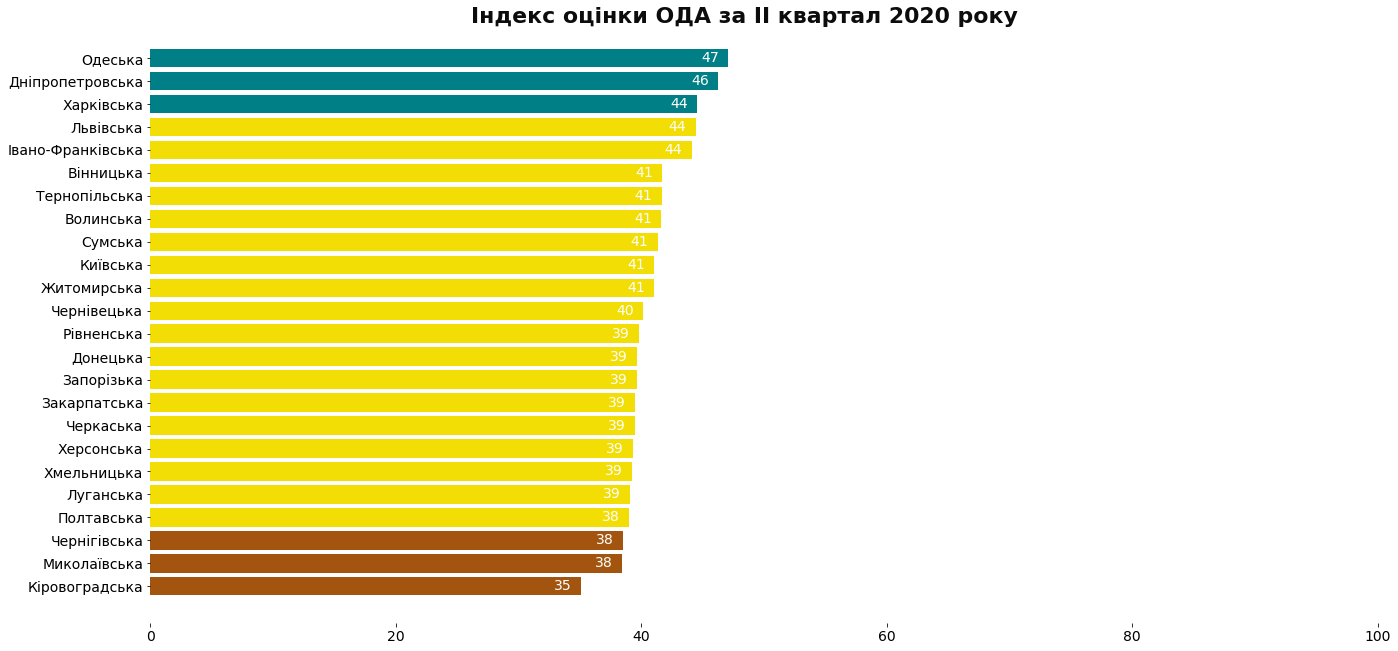

In [11]:
rcParams['font.size'] = 14
df_index_hist = df_index[['region','I']].sort_values(by='I').reset_index(drop=True)

fig = plt.figure(figsize=(22,10))
ax = plt.subplot(111)
delete_frame(ax)
colors = ['#a3550f','#f2dd05','#007f86']
colors_list = [colors[0] for r in range(3)] + [colors[1] for y in range(df_index_hist.shape[0]-6)] + [colors[2] for g in range(3)]

ax.barh(df_index_hist['region'],df_index_hist['I'],color=colors_list)
for i in df_index_hist.index:
    ax.annotate(int(df_index_hist.loc[i,'I']),xy=(df_index_hist.loc[i,'I']-2.2,df_index_hist.loc[i,'region']), c='white', va='center')
ax.set_xlim(0,100)

fig.suptitle('Індекс оцінки ОДА за ІІ квартал 2020 року', fontsize=22, weight='bold', alpha=0.95)
plt.subplots_adjust(top=0.96)
plt.savefig('./../00_viz/00_index_ranking_v3.png', dpi = 300, bbox_inches = 'tight', pad_inches=0.3, transparent=False)
plt.show()